In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle

### BEGIN show_all
def _show_all():
    try:
        from IPython.core.interactiveshell import InteractiveShell
        InteractiveShell.ast_node_interactivity = "all"
    except:
        pass 
### END show_all
    
### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Principle Component Analysis<a class='tocSkip'></a>
## Reduction of dimensionality of a problem <a class='tocSkip'></a>
## 0.1 - February 2020 <a class='tocSkip'></a>

> In this note, we will take a look at _Principle Component Analysis_ (PCA) which is a sound statistical method for reducing the dimensionality of a problem.  PCA also provides a method of _classifying_  observations which is mathematically sound and linear (as opposed to other methods such as _Boosted Decision Trees_ or _Neural Networks_). 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduction

The idea of principal component analysis (PCA) is pretty straight forward.   Suppose we have a multi-variate data sample 

$$X=\left\{\left(x_1,\ldots,x_p\right)_i\,\middle|\,i=1,\ldots,N\right\}\quad,$$ 

centered around 0 and with unit standard deviation in each component $x_i$.  If this is not the case, then we can simply shift and scale our data set so that 

$$X'=\left\{\frac{x_1-\overline{x}_1}{s_1},\ldots,\frac{x_p-\overline{x}_p}{s_p}\,\middle|\,i=1,\ldots,N\right\}\quad,$$

where $\overline{x}_j,s_j$ are the mean and standard deviation, respectively, of the $j=1,\ldots,p$ component.  We then substitute $X'$ for $X$ below. 

We can calculate the covariance matrix of this data set by 

$$C = \frac{X^TX}{N-1}\quad,$$ 

which is an $p\times p$ symmetric matrix.  Because of this, we can decompose $C$ as 

$$C = V\Lambda V^{-1}\quad,$$ 

where $V$ is the matrix with of eigen-vectors (as columns) and $\Lambda$ is the diagonal matrix of eigen-values. 

From linear algebra we know that the set of eigenvectors form an orthonormal basis of the space spanned by $C$.  Thus, we also know from linear algebra that we can write any $X_i$ as a linear combination of the eigenvectors $v_j$

$$x_i = \sum_{i=1}^{p}a_{ij} v_j\quad,$$ 

and $a_{ij}$ are coefficients.   Suppose we truncate this sum at some $k < p$, so that we have 

$$x_i' = \sum_{j=1}^{k}a_{ij} v_j\quad k < p\quad,$$

then we want to minimize the error

$$\Delta_k = \frac{1}{N}\sum_{i=1}^{N} \left(x_i - x'_i\right)^2
 = \left\langle\left(\sum_{j=k+1}^{p} a_{ij}v_j\right)^2\right\rangle
 = \left\langle\left(x_i - \sum_{j=1}^{k} a_{ij}v_j\right)^2\right\rangle\quad,$$

where $\langle\cdot\rangle$ indicates the average of the $N$ samples. 

Multiplying the truncated expansion and using that the eigen-vectors are orthonormal ($v_i\cdot v_j=\delta_{ij}$), we find 

$$a_{ij} = x_i^T\cdot v_j\quad,$$

so that 

\begin{align*}
  \Delta_k 
  &= \left\langle\left(\sum_{j=k+1}^{p}a_{ij}v_j\right)^2\right\rangle\\
  &= \left\langle\left(\sum_{j=k+1}^{p}x_i^Tv_jv_j\right)^2\right\rangle\\
  &= \left\langle\sum_{j=k+1}^{p}v_j^Tx_ix_i^Tv_j\right\rangle\quad\text{because}\ v_i\cdot v_j=\delta_{ij}\\
  &= \sum_{j=k+1}^{p} e_j^T C e_j\quad,
\end{align*}

and the minimum is when each term in the sum is minimum (since $C$ is positive definite).  

By method of Lagrange multipliers we get 

$$\Delta_k = \sum_{j=k+1}^{p} v_j^T C v_j - l_j v_j^T v_j + l_j),\quad$$

and the minimum condition 

$$\frac{d\Delta_k}{dv_j}=0\quad,$$

leads to 

$$Cv_j= l_jv_j$$ 

showing that $v_j$ are eigenvectors of $C$ with eigenvalues $l_j$. 

The estimate of the error is then 

$$\Delta_k \approx \sum_{j=k+1}^p l_j\quad,$$ 

where $l_{k+1},\ldots,l_{p}$ are the associated eigen-values of the eigen-vectors omitted in the above truncated expansion.  Thus, the error is small if we leave out the $p-k$ eigen-vectors corresponding to the least $p-k$ eigen-values. 

See also [a neat proof given on StackExchange](https://stats.stackexchange.com/questions/217995/what-is-an-intuitive-explanation-for-how-pca-turns-from-a-geometric-problem-wit#answer-219344)

# Transform

We want to set up the transformation from our sample space $\mathbb{X}$ into the space $\mathbb{P}$ spanned by the eigenvectors $v_j$. This space, $\mathbb{P}$, is called the _principal_ vector space owing to the orthogonality of the eigenvectors, and because the dimensions are ordered by the associated eigenvalues.  The projection is simply given by 

$$q = Vx\quad,$$ 

and is called the _principal component_ of $x$.  Here, $V$ is the matrix of eigenvectors (or _principal axes_) of $C$.   The inverse transformation is simply 

$$x = V^Tq\quad,$$ 

because $V$ is real and orthonormal.  

We can also form the inverse transform, but using only the $k$ most important principal axes 

$$x_k = V_k^Tq\quad,$$ 

where $V_k$ is the $k$ first columns of $V$, corresponding to the $k$ most important eigenvalues (and -vectors). 

If $k=p$, then clearly 

$$x_p = V_p^Tq = V^Tq = V^TVx = x\quad.$$ 

However, if $k<p$, we make an error given by 

$$\delta_k = |x - x_k| = |x - V_k^Tq| = |x - V_k^TVx|\quad,$$

which we can evaluate for any $x$.  If this error is small, then $x$ belongs in the sub-space spanned by $C$.  Since $x$ is normalised to the standard deviation of sample $X$ a value larger than 1 signifies significant deviation. 

# Implementation

## The `PCA` class 

Our implementation will be done as a class called `PCA`.  We will construct objects of this class by passing in a training sample, and we will have methods to do the transform from sample space $\mathbb{X}$ to pattern space $\mathbb{P}$ and vice versa.  Furthermore, we will have a few properties we can query.  

Our interface is then 

| *Interface*      | *Description*                                         |
|:-----------------|:------------------------------------------------------|
| `PCA(data)`      | Find eigenvalues and -vectors of covariance of `data` |
| `to_pc(data)`    | Transform `data` from $\mathbb{X}$ to $\mathbb{P}$    |
| `from_pc(pca,k)` | Transform `pca` from $\mathbb{P}$ to $\mathbb{X}$ using the `k` most significant eigenvectors |
| `test(data,k)`   | Get distance of transform, using the `k` most significant eigenvectors, to the training sample space $\mathbb{X}$ |
| `mean`           | Means of training sample |
| `std`            | Standard deviations of training sample |
| `l`              | Eigenvalues |
| `v`              | Eigenvectors |

Let us implement a class to do the PCA, transforms, and testing for us.

In [2]:
class PCA:
    def __init__(self,data=None,cov=None,ddof=1,scale=False):
        from numpy import dot, ones, zeros, sqrt, diagonal
        from numpy.linalg import eigh, norm
    
        self._scaled = scale
        if cov is None:
            d       = self._center(data,scale)     
            cov     = dot(d.T, d) / (len(d)-ddof)
        else:
            self._m = zeros(cov.shape[0])
            self._s = sqrt(diagonal(cov.shape[0]))
            
        l, v    = eigh(cov)  # Real symmetric
        self._l = l[::-1] / norm(l)
        self._v = v[:,::-1] 
        
    def to_pc(self,data):
        return ((data-self._m)/self._f()).dot(self._v)

    def from_pc(self,pca,k=None):
        from numpy import atleast_2d

        k  = self._k(k)
        pp = atleast_2d(pca)
        return self._m + pp[:,:k].dot(self._v.T[:k,:])*self._f()

    def test(self,data,k=None):
        from numpy import sqrt
        
        k  = self._k(k)
        xx = self.from_pc(self.to_pc(data),k)
        r2 = ((data-xx)/self._f())**2
        return sqrt(r2.sum(axis=1))/k

    @property 
    def mean(self): 
        return self._m 
    
    @property 
    def std(self): 
        return self._s 
    
    @property 
    def l(self):
        return self._l 
    
    @property 
    def v(self):
        return self._v 
    
    def _f(self):
        from numpy import ones_like
        return self._s if self._scaled else ones_like(self._s)
    
    def _k(self,k):
        if k is None:
            return len(self)
        if k <= 0:
            raise ValueError(f'k={k} is smaller than 1')
        if k > len(self):
            raise ValueError(f'k={k} is larger than p={len(self)}')
        return k
    
    def _center(self,data,scale):
        from numpy import allclose,zeros,ones 

        n, m   = data.shape
        if n < 1:
            raise ValueError('Input data is singular')
        if m is None or m < 2: 
            raise ValueError('Input data is one-dimensional')

        d       = data
        self._m = d.mean(axis=0)
        self._s = d.std(axis=0)

        if not allclose(self._m,zeros(m)):
            d = d.copy() - self._m

        if scale and not allclose(self._s,ones(m)):
            if d is data: d = d.copy()
            d /= self._s

        return d
    
    def __len__(self):
        return len(self._m)

    def __str__(self):
        return f'{"mean":10} {"std":10}  {"lambda":10} {"V"}\n'+\
            '\n'.join([f"{m:10g} {s:10g}  {l:10g} " 
                       + ' '.join([f"{v:10g}" for v in vc])
                       for m,s,l,vc in zip(self._m,self._s,self._l,self._v)])
    
    def _repr_mimebundle_(self,include,exclude):
        from nbi_stat import format_data_table
        from numpy import vstack 
        
        c = ['Mean','Std','Eigenvalue','Eigenvector'] + ['']*(len(self.mean)-1)
        a = vstack((self.mean,self.std,self.l,self.v)).T 
        
        return {f'text/{t}': format_data_table(a,columns=c,mode=t,nsig=2)
                for t in ['markdown','html','latex']}

## Test of class 

Let us test this class.  First, we define a function to generate our data.  We will make $N$ samples of 3-dimensional data 

$$
D = \left\{(x_i,y_i,z_i)
  \,\middle|\,
  i=1,\ldots,N\space\wedge\space
  \begin{array}{rcl}
    x_i &\sim& \mathcal{N}[1,2]\\
    y_i &\sim& \mathcal{Exp}[3]\\
    z_i &\sim& (x_i + y_i) (1 + \mathcal{N}[0,\sigma])
  \end{array}
  \right\}\quad,
$$

where $\sigma$ is a "noise" parameter. 

In [3]:
def makeData(n=100,sigma=0.05):
    from numpy.random import normal, exponential
    from numpy import vstack 
    x = normal(1,2,size=n)
    y = exponential(3,size=n)
    z = (x+y)*(1 + normal(0,sigma,size=n))
    return vstack((x,y,z)).T

Let us generate a training sample and plot it

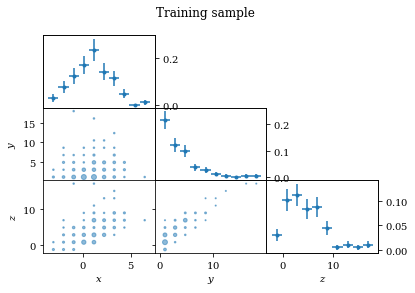

In [4]:
from nbi_stat import corner_plot, scatter_hist2d
from numpy.random import seed 

seed(321)
train = makeData()
corner_plot(train,dia_kw={'fmt':'.'},
            off=scatter_hist2d,off_kw={'alpha':.5,'scale':5},
            title='Training sample',names='auto');

We can now make our PCA object on this training data 

In [5]:
p = PCA(train)
p

Let us plot the eigenvalues to get a better idea of what we have

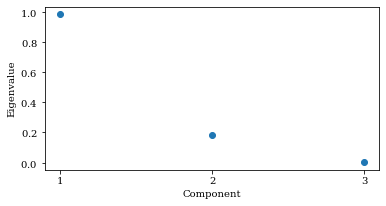

In [6]:
from matplotlib.pyplot import plot, xlabel, ylabel, xticks, figure
from numpy import arange 

figure(figsize=(6,3))
plot(arange(len(p)),p.l,'o',label='Eigenvalues')
xlabel('Component')
ylabel('Eigenvalue')
xticks(arange(len(p)),arange(len(p))+1);

We see that the third component has a low eigenvalue ($\approx 0.001$) compared to the other eigenvalues.  We will use this a little later. 

## Round-robin transform 

Since the PCA transform is a linear transform it is fully reversible (up to machine precision).  That means that if we transform our training sample (or any other sample) from the sample space $\mathbb{X}$ to the pattern space $\mathbb{P}$ and then back to the sample space $\mathbb{X}$ using all $p$ eigenvector, we must recover the original sample.  That is, the transformation 

$$x \rightarrow p \rightarrow x'\quad,$$

should be the identity transform. 

We transform our training sample to $\mathbb{P}$ space and the back again to the $\mathbb{X}$ space.  We then assert that the round-robin transform is the identity. 

In [7]:
from numpy import allclose 

assert allclose(train,p.from_pc(p.to_pc(train)))

## Illustration 

Since our data set is 3-dimensional we can just barely illustrate the PCA.  We plot the original data points, as well as the data points transformed back to the sample space $\mathbb{X}$ using only the 2 most significant eigenvectors.  We illustrate the plane spanned by these two eigenvectors (in red and green) and draw all three eigenvectors too. 

In [8]:
from matplotlib.pyplot import figure, Figure
from mpl_toolkits.mplot3d import Axes3D
from numpy import cross, empty, meshgrid

fig = Figure(figsize=(10,10))
# ca  = fc(fig)
ax = fig.add_subplot(111, projection='3d')

xx  = train
ax.scatter(*xx.T,label='Original')
pp  = p.to_pc(xx)
yy  = p.from_pc(pp,2)
ax.scatter(*yy.T,label='Reduced')

vv     = p.v.T * p.std
nn     = cross(vv[0],vv[1])
dd     = -p.mean.dot(nn)
mx, my = meshgrid(ax.get_xlim(),ax.get_ylim())
mz     = (-nn[0] * mx - nn[1] * my - dd) * 1. /nn[2]
sf = ax.plot_surface(mx,my,mz,alpha=.2,label='Principal plane')
setattr(sf,'_edgecolors2d',empty((0,4)))
setattr(sf,'_facecolors2d',empty((0,4)))

ax.quiver3D(*p.mean,*vv.T,length=2,
            colors=((.8,0,0),(0,.8,0),(0,0,.8),
                    (.8,0,0),(.8,0,0),
                    (0,.8,0),(0,.8,0),
                    (0,0,.8),(0,0,.8)),
            label='Eigen-vectors')

ax.legend();

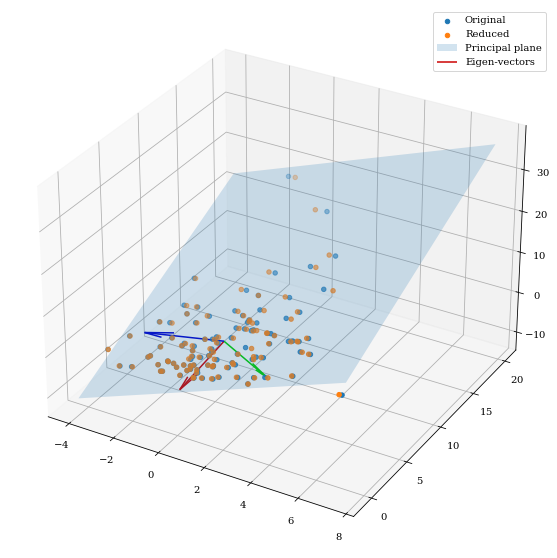

In [9]:
fig

We can also illustrate the back-transformed training sample together with the original training sample in a corner plot 

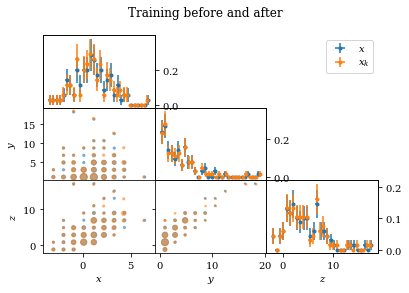

In [10]:
corner_plot(train,'$x$',yy,'$x_k$',
            dia_kw={'fmt':'.','bins':30},
            off=scatter_hist2d,off_kw={'alpha':.5,'scale':10},
            title='Training before and after',names='auto',legend=True);

## Distance of $x_{k}$ to $\mathbb{X}$

We saw earlier that the last eigenvalue was low compared to the other eigenvalues.  That means that the training sample space $\mathbb{X}$ is mostly spanned by the two first components.  Thus, if we ignore the last eigenvector and do the transform 

$$x \rightarrow p \xrightarrow{k=2} x_k\quad,$$ 

we expect the distance 

$$\delta_k = |x - x_k|_{\sigma}\quad,$$ 

where the distance is normalised to the standard deviations of the training sample, to be small. 

We calculate the distance of the training sample with $k=2$ and plot the distribution. 

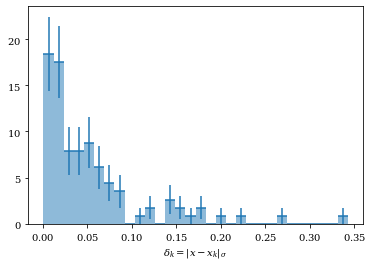

In [11]:
from nbi_stat import histogram
from matplotlib.pyplot import bar,xlabel,ylabel

hy,hx,hw,he = histogram(p.test(train,k=2),30,normalize=True)
bar(hx,hy,hw,xerr=hw/2,yerr=he,alpha=.5,color='C0',ecolor='C0')
xlabel(r'$\delta_k=|x-x_k|_{\sigma}$');

As expected, we see relatively small deviations. Remember, $\delta_k=1$ corresponds to one standard deviation away from the training sample. 

# Classification using PCA

Next, we will see how we can use PCA to _classify_ observations.  By classifying observations we mean we estimate if a given observation belongs to a particular _class_ of observation.   Here, we will consider two classes of observations 

- _Background_ events 
- _Signal_ events 

For both kinds of events, we will have $p$-dimensional observations.  We will set-up our classification by training on samples that we _know_ (e.g., through simulation) belong to one class.  

## Samples 

We start by making a function to generate our samples of the form 

$$\left\{(x_i,y_i,z_i)\,\middle|\,i=1,\ldots,N\right\}\quad.$$

For the _background_ sample we have

\begin{align*}
  b_i &\sim \mathcal{N}\left[0,1\right]\\
  x_i &\sim \frac{21}{10}+\frac{3}{4}b_i\\
  y_i &\sim 3 + \frac{3}{20} b_i + \frac12\mathcal{U}\{-1,1\}\\
  z_i &\sim \frac{17}{20}(x_i^2+y^2)\quad,
\end{align*}

where $\mathcal{U}\{a,b\}$ is the _uniform discrete distribution_ between $a$ and $b$. $b_i$ are _not_ part of the samples but form the bases of $x_i$ and $y_i$.  For the _signal_ sample we have 

\begin{align*}
  x_i &\sim \mathcal{N}\left[2,\frac32\right]\\
  y_i &\sim \mathcal{N}\left[3,\frac12\right]\\
  z_i &\sim x_i^2 + y_i^2\quad,
\end{align*}

In [12]:
def makeSample(signal=False,n=4000):
    from numpy import vstack, zeros_like
    from numpy.random import normal, choice
    
    mx = 2   if signal else 21/10
    sx = 1   if signal else 3/4
    sy = .5  if signal else 3/20
    sz = 1   if signal else 17/20
    b  = normal(size=n)
    x  = mx + sx * b
    y  = normal(3,sy,size=n) if signal else 3 + sy * b
    if not signal: 
        y += choice([-.5,0.,.5],size=n)
    z  = sz * (x**2+y**2)
    return vstack((x,y,z)).T

## Training samples 
We generate our _background_ and _signal_ training samples and plot them

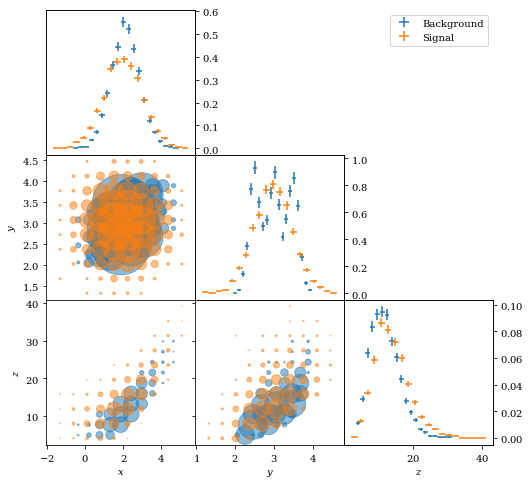

In [13]:
from numpy.random import seed 

seed(4321)
tb = makeSample()
ts = makeSample(True)
corner_plot(tb,'Background',
            ts,'Signal',
            dia_kw={'bins':20,'fmt':'none'},
            off=scatter_hist2d,off_kw={'alpha':.5},
            names='auto',legend=True,fig_kw={'figsize':(8,8)});

## Training 
We can now train _two_ PCAs using the above sample

In [14]:
pb = PCA(tb)
ps = PCA(ts)
from IPython.display import Markdown
display(Markdown('**Background**'),pb,
        Markdown('**Signal**'),    ps)

**Background**

**Signal**

We note that the eigenvectors and -values for the two samples are _not_ equal. 

We want to draw the distance to the background and signal back-transformed spaces using a subset $k<p$ of the components.  Since we will do this a few times over, we define a small function to help us do that. 

In [15]:
def plot_distance(pca,bg,sg,k,cut=None,nbins=100,ax=None,fmt='.',
                  bg_name='Background', sg_name='Signal'):
    from matplotlib.pyplot import gca 
    from numpy import linspace, argmax
    from nbi_stat import histogram
    
    if ax is None: ax = gca()
    tb   = pca.test(bg,k)
    ts   = pca.test(sg,k)
    bins = linspace(min(tb.min(),ts.min()),
                    max(tb.max(),ts.max()),nbins)
        
    yb,xb,wb,eb = histogram(tb,bins=bins,normalize=True)
    ys,xs,ws,es = histogram(ts,bins=bins,normalize=True)
    
    if isinstance(cut,str) and cut == 'auto':
        cut = 1 
    if not isinstance(cut,float):
        cut = xb[argmax(cut*(ys-yb) > 1e-6)]
    
    ax.bar(xb,yb,wb,yerr=eb,xerr=wb/2,color='C0',ecolor='C0',alpha=.5,label=bg_name)
    ax.bar(xs,ys,ws,yerr=es,xerr=ws/2,color='C1',ecolor='C1',alpha=.5,label=sg_name)    
    if cut is not None:
        ax.axvline(cut,color='k',label=f'Cut {cut:.2}',ls='--',alpha=.5)
    ax.set_xlabel(r'$\delta_k$')
    return cut

Let us now draw the distribution of distances to the _background_ and _signal_ back-transformed spaces using only $k=2$ components.

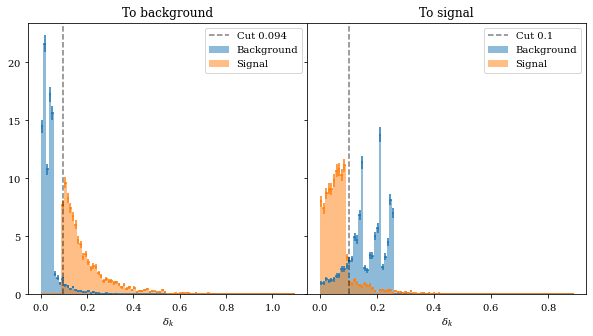

In [16]:
from matplotlib.pyplot import subplots 

fig, ax = subplots(ncols=2,figsize=(10,5),sharey=True,
                   gridspec_kw={'wspace':0})
cb = plot_distance(pb,tb,ts,2,1,ax=ax[0])
ax[0].set_title('To background')
ax[0].legend();
cs = plot_distance(ps,tb,ts,2,-1,ax=ax[1])
ax[1].set_title('To signal')
ax[1].legend();

The lines above indicate cut values where the background and signal distributions differ.  We can use that to distinguish between _background_ and _signal_ observations.  

## Test samples
We saw that the distributions of distances.  Let us make two _test_ samples of background and signal observations, and then use how the distances differ to classify the observations

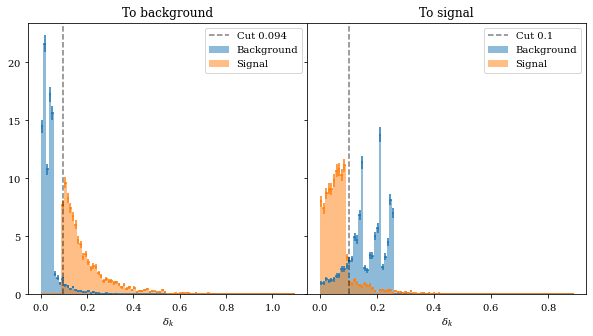

In [17]:
seed(12345678)
xb = makeSample()
xs = makeSample(True)

fig, ax = subplots(ncols=2,figsize=(10,5),sharey=True,
                   gridspec_kw={'wspace':0})
plot_distance(pb,tb,ts,2,cb,ax=ax[0])
ax[0].set_title('To background')
ax[0].legend();
plot_distance(ps,tb,ts,2,cs,ax=ax[1])
ax[1].set_title('To signal')
ax[1].legend();

## Testing 

To use our PCAs for classification we will for a given observation $x$ calculate the distances 
$\delta_k^{bg}$ and $\delta_k^{sg}$ to the background and signal training samples, respectively. 

Given the cuts $c^{bg}$ and $c^{sg}$ for background and signal, respectively, we will then classify the observation according to 

$$
\begin{cases}
  \text{background} & \frac{\delta_k^{bg}}{c^{bg}} < \frac{\delta_{k}^{sg}}{c^{sg}}\\
  \text{signal}     & \text{otherwise}
\end{cases}\quad.
$$

We code this up in a small function

In [18]:
def classify(pca_bg,pca_sg,cut_bg,cut_sg,k_bg,k_sg,data):
    return pca_bg.test(data,k_bg) / cut_bg >= pca_sg.test(data,k_sg) / cut_sg 

### Confusion matrix 

Given our two test samples, we can evaluate how often our classification is correct. We do this by calculating the _confusion matrix_.   That is

- How often we correctly identify a signal observation as signal (_true positive_) 
- How often we correctly identify a background observation as background (_true negative_) 
- How often we incorrectly identify a background observation as signal (_false positive_ a.k.a. Type I error) 
- How often we incorrectly identify a signal observation as background (_false negative_ a.k.a. Type II error) 

The confusion matrix is thus a $2\times2$ matrix.  We code this up as a simple function that returns the confusion matrix. 

In [19]:
def confusion_matrix(pca_bg,pca_sg,bg,sg,classifier):
    from numpy import array 
    nbg, nsg = len(bg), len(sg)
    ntp      = sum(classifier(pca_bg,pca_sg,sg))
    nfp      = sum(classifier(pca_bg,pca_sg,bg))
    return array([[1-nfp/nbg, nfp/nbg],[1-ntp/nsg, ntp/nsg]])

We also want to illustrate the confusion matrix, so we code up another function to do that 

In [20]:
def plot_confusion(cm,title='',ax=None,cmap='cividis',bg_name='Backg.',sg_name='Signal',**kwargs):
    from numpy import ndenumerate
    from matplotlib.pyplot import gca,colorbar 
    ax = gca() if ax is None else ax 
    
    a = ax.matshow(cm,vmin=0,vmax=1,cmap=cmap,**kwargs)
    
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xticklabels([bg_name,sg_name])
    ax.set_yticklabels([bg_name,sg_name])
    ax.tick_params(axis="x",bottom=True,top=False,labelbottom=True,labeltop=False)
    ax.set_xlabel('Found')
    ax.set_ylabel('True')
    ax.set_title(title)
    
    for (j,i),v in ndenumerate(cm):
        c = 'k' if v > .5 else 'w'
        ax.text(i,j,fr'${v*100:.1f}\%$',
                color=c,ha='center',va='center')
    
    return a

Let us draw up our confusion matrix 

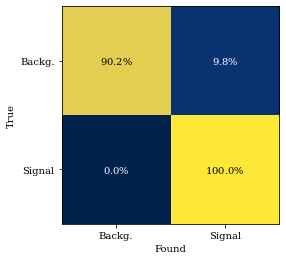

In [21]:
cl = lambda pca_bg, pca_sg, dt : \
    classify(pca_bg, pca_sg, cb, cs, 2, 2, dt)
cm = confusion_matrix(pb,ps,xb,xs,cl)
plot_confusion(cm);

We see we make _no_ Type II errors (false negatives) and only $9.8\%$ Type I errors (false positives). 

### Comparison to Boosted Decision Tree and Neural Network

Here, we compare the power of the above PCA approach of classifying observations to that of a _Boosted Decision Tree_ (BDT) and _Multi-Layer Perceptron (MLP - Neural Network)_ algorithms.  First, a function to do the BDT or MLP

In [22]:
def tryLearn(tb,ts,xb,yb,Classifier,**kwargs):
    from numpy import concatenate,zeros_like,ones_like,flip,newaxis,hstack
    from numpy.random import shuffle 
    from sklearn.metrics import confusion_matrix
    
    def mk(b,s):
        x = hstack((concatenate((b,s)),
                    concatenate((zeros_like(b[:,0]),
                                 ones_like(s[:,0])))[:,newaxis]))
        shuffle(x)
        return x[...,:-1],x[...,-1]

    cls   = Classifier(**kwargs)
    cls.fit(*mk(tb,ts))
        
    t, c = mk(xb,xs)
    p = cls.predict(t)
    return confusion_matrix(c,p,normalize='true')

Then, we perform the BDT and MLP on our samples and plot the confusion matrix

In [23]:
try:
    from sklearn.neural_network import MLPClassifier
    from sklearn.ensemble import AdaBoostClassifier

    fig, ax = subplots(ncols=3,figsize=(10,3))
    plot_confusion(cm, 'PCA', ax=ax[0]);
    plot_confusion(tryLearn(tb,ts,xb,xs,AdaBoostClassifier),'BDT',ax=ax[1])
    plot_confusion(tryLearn(tb,ts,xb,xs,MLPClassifier,hidden_layer_sizes=(10,),solver='lbfgs',random_state=1234),
                  'MLP', ax=ax[2])
    fig.tight_layout()
except Exception as e:
    print(f'Failed to import Ada or MLP: {e}')
    # e.with_traceback()

Failed to import Ada or MLP: No module named 'sklearn'


Compared to PCA 

- BDT: we make many more ($7.6\%$ compared to _none_) Type II errors, 
  and but fewer ($7.0\%$ compared to $9.8\%$) Type I errors.  
- MLP: we have _no_ Type II errors and a little fewer ($8.0\%$ compared to $9.8\%$) Type I   errors.

What is more, we have lost the ability to transform back to the original training sample as BDT and MLP are essentially a black-box and non-linear.  Note, the MLP algorithm is dependent on the random state.

In [24]:
PCA.__doc__=\
    """Class to do a PCA
    
    Find eigenvectors and -values of covariance matrix of the n 
    observations of the p-dimensional data. 
        
    Parameters
    ----------
    data : array-like, shape=(n,p) 
        n p-dimensional observations 
    cov : array-like shape=(p,p), optional 
        Covariance matrix.  If given, we ignore the data argument, 
        and assume means to be zero and standard deviations to be 1
    ddof : int 
        Bias correction for number degrees of freedom (1 for unbiased)
    """

PCA.to_pc.__doc__=\
        """Transform from sample to principal space
        
        Parameters
        ---------- 
        data : array-like shape=(m,p)
            m p-dimensional observations.  
            p must be the same as the initial training data. 
            
        Returns
        -------
        pca : array-like shape=(m,p)
            Data transformed into the principal space 
        """

PCA.from_pc.__doc__=\
        """Transform from principal to sample space
        
        Parameters
        ---------- 
        pca : array-like shape=(m,p)
            m p-dimensional observations in principal space 
        k : int, optional 
            If given, use only the k most principal components 
            for the transformation 
        """

PCA.test.__doc__=\
        """Evaluate distance to the k-subspace of the prinicple space
        
        This method first transforms all the training sample to the 
        principal space and then transforms back to the sample space 
        using only the k largest principal components.  
        
        It then evaluates the (Eucledean) distance from the samples to the 
        back-transformed sample and returns that. 
        
        Parameters
        ----------
        data : array-like shape=(m,p)
            m p-dimensional test samples 
        k : int, optional 
        
        Returns
        -------
        r : array-like shape=(m,)
            Residuals after forward and backward transform. 
        """

PCA.mean.__doc__="""Means of the training sample"""

    
PCA.std.__doc__="""Standard deviations of the training sample"""

PCA.l.__doc__="""Sorted eigenvalues"""

PCA.v.__doc__="""Sorted eigenvectors (in columns)"""

PCA._repr_mimebundle_.__doc__="Formatting for notebooks"

In [25]:
plot_distance.__doc__=\
    """Plot distance to k-dimensional subspace 
    
    Parameters
    ----------
    pca : PCA 
        Principal component analysis 
    bg : array-like 
        Background sample 
    sg : array-like 
        Signal sample 
    cut : int, float 
        If a float, the cut value to draw 
        If an integer, finds cut value 
        1 for selecting background, -1 signal 
    nbins : int 
        Number of bins to show distribution in 
    ax : matplotlib.axes.Axes 
        Axes to plot in 
    fmt : str
        Format of points
    
    Returns
    -------
    cut : float 
        The cut value (possibly found)
    """

In [26]:
confusion_matrix.__doc__=\
    """Calculate confusion matrix from two PCAs
    
    Parameters
    ---------- 
    pca_bg : PCA 
        PCA on background training sample 
    pca_sg : PCA 
        PCA on signal training sample 
    bg : array-like shape=(n,p)
        Background test sample 
    sg : array-like shape=(m,p)
        Signal test sample 
    classifier : callable (f(pca_bg,pca_sg,data))
        Callable to signal discovery
    Returns
    -------
    cm : array shape=(2,2)
        Confusion matrix in the form 
        
            [[True negatives,  False positives]
             [False negatives, True positives]]
             
        Same convention as for sklearn 
    """

In [27]:
plot_confusion.__doc__=\
    """Plot confusion matrix 
    
    Parameters
    ----------
    cm : array-like, shape=(2,2)
        Confusion matrix 
    title : str 
        Title of plot 
    ax : matplotlib.axes.Axes 
        Axes to plot in, if given, otherwise current axes 
    cmap : str or matplotlib.colormap.ColorMap
        Color map to use 
    kwargs : dict 
        addition arguments for matplotlib.axes.Axes.matshow
    
    Returns
    -------
    artist : 
        The matshow artist
    """

In [28]:
version = 0.1